In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()
for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2010-1-1')['Adj Close']

In [3]:
pf_data.tail()

,PG,^GSPC
Date,,
2019-03-15,102.440002,2822.479980
2019-03-18,101.510002,2832.939941
2019-03-19,101.900002,2832.570068
2019-03-20,101.720001,2824.229980
2019-03-21,102.570000,2847.689941


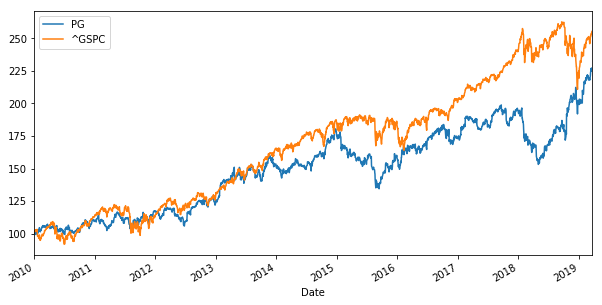

In [4]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [5]:
pf_data.iloc[0]


PG         45.145977
^GSPC    1115.099976
Name: 2009-12-31 00:00:00, dtype: float64

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

PG       0.088470
^GSPC    0.101074
dtype: float64

In [8]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.021234,0.011593
^GSPC,0.011593,0.022308


In [9]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.532672
^GSPC,0.532672,1.000000


In [10]:
log_returns

,PG,^GSPC
Date,,
2009-12-31,NaN,NaN
2010-01-04,0.008049,0.015916
2010-01-05,0.000327,0.003111
2010-01-06,-0.004755,0.000545
2010-01-07,-0.005438,0.003993
2010-01-08,-0.001323,0.002878
2010-01-11,-0.003979,0.001745
2010-01-12,0.011397,-0.009425
2010-01-13,0.010293,0.008291


In [11]:
num_assets = len(assets)

In [12]:
num_assets

2

In [13]:
arr = np.random.random(2)
arr

array([0.11616693, 0.77220244])

In [14]:
arr[0] + arr[1]

0.888369367794449

In [15]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.28855515, 0.71144485])

In [16]:
weights[0] + weights[1]

1.0

In [17]:
np.sum(weights * log_returns.mean()) * 250

0.09743706996527587

In [18]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.01781934119427303

In [19]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.1334891051519675

In [22]:
pfolio_returns = []
pfolio_volatilities = []
for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
pfolio_returns, pfolio_volatilities

(array([0.09539471, 0.09226904, 0.0993173 , 0.0938644 , 0.09823234,
        0.09079526, 0.09550157, 0.09458751, 0.09393089, 0.09494251,
        0.10067827, 0.10060296, 0.09202272, 0.09436933, 0.09197402,
        0.08936188, 0.09145389, 0.09884499, 0.0934196 , 0.09281889,
        0.09521133, 0.09048791, 0.09814365, 0.09777277, 0.09268189,
        0.09498548, 0.09113332, 0.0953693 , 0.09260825, 0.09413559,
        0.09517677, 0.09473631, 0.10073889, 0.09331768, 0.094143  ,
        0.09223814, 0.09365768, 0.09477058, 0.09113479, 0.1007662 ,
        0.09645322, 0.09632365, 0.09394198, 0.09251771, 0.09599852,
        0.0900313 , 0.09153416, 0.09491019, 0.09761602, 0.09925493,
        0.10011621, 0.09503067, 0.09066396, 0.09483757, 0.08962864,
        0.08888253, 0.09525721, 0.09348064, 0.09488469, 0.09133958,
        0.08948028, 0.09361878, 0.09938093, 0.1001849 , 0.0943051 ,
        0.0897311 , 0.08938458, 0.09357891, 0.09895827, 0.09443783,
        0.09273007, 0.09192709, 0.09407752, 0.09

In [26]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})


In [27]:
portfolios.head()

,Return,Volatility
0,0.095395,0.129557
1,0.092269,0.131421
2,0.099317,0.140416
3,0.093864,0.129268
4,0.098232,0.136056


In [28]:
portfolios.tail()

,Return,Volatility
995,0.097336,0.133203
996,0.095481,0.129641
997,0.092093,0.131808
998,0.097742,0.134409
999,0.099946,0.143363


In [ ]:
portfolios.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Exp')